# Fake News Detector - DataScience Final Project

### Project Description
#### The project is to evaluate the provided data about multiple news articles and classify them into Fake News or not

### Kaggle Data Source:
#### https://www.kaggle.com/c/fake-news/data?select=train.csv

### Importing basic required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Read the data into dataframes for further manipulation

In [2]:
train_dataset=pd.read_csv("../data/raw/train.csv")
train_dataset.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


## Data Cleaning and Preprocessing

### 1. Remove NaN records

#### If present, text records with NaN data would have terrible impact on Feature Engineering as well as the algorithms being applied on the features.

In [3]:
train_dataset = train_dataset.dropna()

In [4]:
train_dataset.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


### 2. Reset Index
#### Resetting Index for maintaining handle on further data access.

In [5]:
train_dataset.reset_index(inplace=True)

### 3. Dropping unnecessary columns 
#### Index and ID columns do not add any value either to feature engineering or processing, hence dropping those columns

In [6]:
train_dataset=train_dataset.drop(['id','index'], axis = 1)
train_dataset.head(10)

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


## Feature Engineering

### 1.  Stemming and Lemmatization

#### PorterStemmer algorithm for performing Stemming and Lemmatization process on the words.
#### Stemming and Lemmatization evaluates relevant words and categorizes and converts them into a base word.
#### Example : student, student's, students $\Rightarrow$ student
#### What is Stemming and Lemmatization ? see here : https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

### 2. Remove and Replace Special Characters

#### Replace all special characters with empty string.

### 3. Change to Lower Case.

#### Convert all words to lower case, irrespective of what the original case is.

### 4. Remove unnecessary words

#### Using Stop Words library we filter and remove unnecessary general words/terms like, he, she, but, if etc.

#### *though we have title and text, most of the times, title is subset of text, so we are performing our feature engineering on text.

In [7]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [8]:
transformedTitle=[]
ps = PorterStemmer()
for i in range(0, len(train_dataset)):
    review = re.sub('[^a-zA-Z]', ' ', train_dataset['title'][i]) # Change this to Text, for testing purposes using title
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    transformedTitle.append(review)

In [9]:
transformedTitle

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

### 5. Feature Extraction Using bag of words

#### Implemented it using CountVectorizer algorithm
#### Convert a collection of text documents to a matrix of token counts
#### Reference: https://en.wikipedia.org/wiki/Bag-of-words_model#:~:text=The%20bag%2Dof%2Dwords%20model,word%20order%20but%20keeping%20multiplicity.

#### Parameters to Count Vectorizer :
#### a. MAX_FEATURES: Pull out top n most frequently used words
#### b. NGRAM_RANGE: Sizes of combinations of words to consider 
#### Example: {hey, hello New York, New york} 
#### In the above example we consider single word, hey, two words together like New York and also three words together like "hello New York" 

In [10]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(transformedTitle).toarray()

#### Lets quickly see the transformedText for the first news article and see at which index of the bag of words can we find the word available. Logic below identifies and prints the word only if it has a value > 0 for that word in the text.

In [11]:
print(transformedTitle[0],"\n")
for i in range(5000):
    if(X[0][i] != 0):
        print(cv.get_feature_names()[i], " is found at index ",i, " in the bag of words")

hous dem aid even see comey letter jason chaffetz tweet 

aid  is found at index  89  in the bag of words
chaffetz  is found at index  645  in the bag of words
comey  is found at index  820  in the bag of words
comey letter  is found at index  822  in the bag of words
dem  is found at index  1103  in the bag of words
even  is found at index  1453  in the bag of words
hous  is found at index  2049  in the bag of words
jason  is found at index  2241  in the bag of words
jason chaffetz  is found at index  2242  in the bag of words
letter  is found at index  2457  in the bag of words
see  is found at index  3868  in the bag of words
tweet  is found at index  4613  in the bag of words


In [12]:
train_dataset.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


## comparing realiable and unrealiable data

<AxesSubplot:>

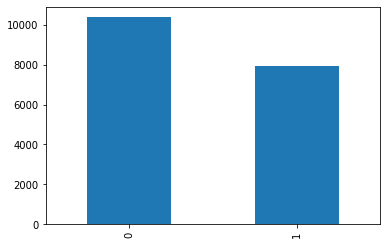

In [13]:
train_dataset['label'].value_counts().plot.bar()

## Top 20 authors in news

In [14]:
import cufflinks as cf
cf.go_offline()

In [15]:
train_dataset.author.value_counts()[:20].iplot(kind='bar', title='Top 20 authors in news', color='red')

## Word cloud

### word cloud for reliable data

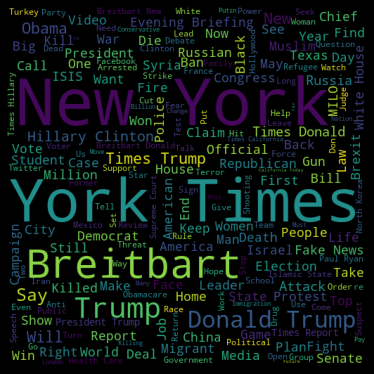

In [16]:
real=' '.join(list(train_dataset[train_dataset['label']==0]['title']))
real=WordCloud(width=512, height=512).generate(real)
plt.figure(figsize=(5,5),facecolor='k')
plt.imshow(real)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### wordcloud for unreliable data

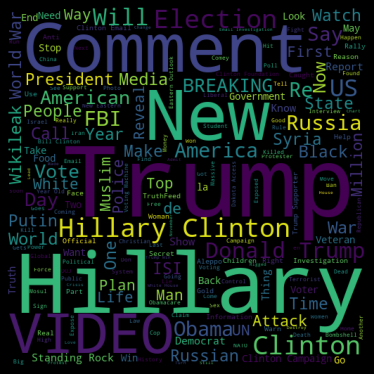

In [17]:
real=' '.join(list(train_dataset[train_dataset['label']==1]['title']))
real=WordCloud(width=512, height=512).generate(real)
plt.figure(figsize=(5,5),facecolor='k')
plt.imshow(real)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### We are now going to utilize these bag of words to train and test the classification of news articles into fake or not.

#### Copying the classification data into y 

In [18]:
y=train_dataset['label']

### Split the dataset into test and train, using test size 0.2

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Classification of the dataset

### Multinomial Naive Bayesian

#### Based on some research over the internet we understand that Multinomial NB works pretty well for text data classification.

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier=MultinomialNB()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
confusionMatrix = confusion_matrix(y_test,predictions)
print(" The achieved accuracy is :", accuracy)
print(" Confusion Matrix \n",confusionMatrix)

 The achieved accuracy is : 0.9015586546349467
 Confusion Matrix 
 [[1823  217]
 [ 143 1474]]


# 1. What Next, try using Multinomina NB with hyperparameter.



In [21]:
#Hyper Paramter Tuning
classifier=MultinomialNB(alpha=0.1)
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/Users/sushmithareddyboddireddy/.local/lib/python3.7/site-packages/sklearn/naive_bayes.py:512: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Alpha: 0.0, Score : 0.8955427946404156
Alpha: 0.1, Score : 0.9051134809953514
Alpha: 0.2, Score : 0.9051134809953514
Alpha: 0.30000000000000004, Score : 0.9059338255400602
Alpha: 0.4, Score : 0.9051134809953514
Alpha: 0.5, Score : 0.9042931364506426
Alpha: 0.6000000000000001, Score : 0.9037462400875034
Alpha: 0.7000000000000001, Score : 0.9026524473612251
Alpha: 0.8, Score : 0.9021055509980859
Alpha: 0.9, Score : 0.9015586546349467


# 2. Use TFIDf vectorizer to perform the same.

# 3. Next try also to use, the other column "author" which can be help full in better data classification
## Steps for it :
## 1. Perform One Hot encoding on author and add that to the X list.
## 2. Run similar classification algorithms.